In [106]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Study of relationship between regression slope

**Goals of this coding challenge**
- will change x and y and see how the model's behavior changes
- further explore ANNs using regression
- will understand difference between predicting data vs data relationships

**Main steps in this challenge**
1. Write a function that creates the data set. 
    - $x$ will be the same as the last project. Just a set of random numbers.
    - $y$ will be defined with the point slope equation $y = mx + randn(1)/2$
    - $N = 50$, for the amount of random numbers. I made this a parameter that can be changed in the function.
    - In the parametric portion of this experiment, $m$, the slope, will be varied from the values of [-2,2].
    - *parameters* m must be a parameter passed in, N can also be passed in.<br><br>

2. Write a python def function that builds and trains the model. It should return the final predictions and losses.
    - should maybe return in a tensor object or something?<br><br>

3. Create a parametric experiment where the slope is varied. The slope should be varied from [-2,2] in 21 steps. Repeat the experiment 50 times for each slope.<br>

4. Plot loss and accuracy (correlation coefficient of $\hat y$ and y), as a function of the slope


In [107]:
# Step 1. Function that creates data set.

def dataset(m, N=50):
    # set of random x values
    x = torch.randn(N,1)

    # equation that defines y
    y = m*x + torch.randn(1)/2

    return x,y

In [108]:
# Step 2. Function that builds and trains model.

def ANN_reg_builder(x_values, y_values, learning_rate=0.05, epochs = 100):
    # building ANN model
    ANN_reg = nn.Sequential(
    nn.Linear(1,1), # input
    nn.ReLU(), # activation
    nn.Linear(1,1) # output 
    )

    # parameters
    loss_func = nn.MSELoss()
    optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate)
    losses = torch.zeros(epochs)

    # training
    for epoch_IDX in range(epochs):
        # forward pass
        y_hat = ANN_reg(x_values)

        # calculating loss
        loss = loss_func(y_hat, y_values)
        losses[epoch_IDX] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    final_predictions = ANN_reg(x_values)
    return final_predictions,losses

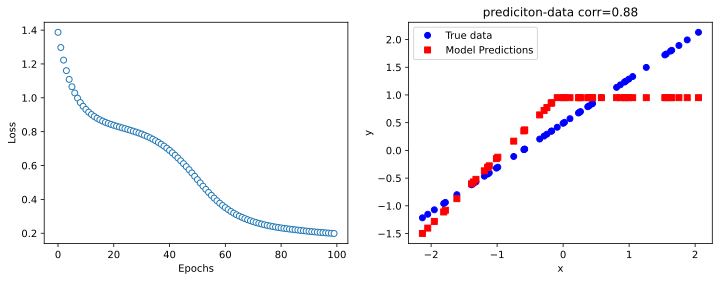

In [113]:
# testing model (good to do this before running the parametric experiment)

x_test,y_test = dataset(0.8) # created data

# run model
y_hat_test, losses_test = ANN_reg_builder(x_test,y_test)

# plotting results
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(losses_test.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(x_test,y_test, 'bo', label='True data')
ax[1].plot(x_test,y_hat_test.detach(), 'rs', label='Model Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediciton-data corr={np.corrcoef(y_test.T,y_hat_test.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [110]:
# Step 3. Parametric experiment of varying slope.

# parameters
slope = np.linspace(-2,2,21)
exp_num = 50

# storing results for each run. Only want to know the y prediction values and the losses for each run.
results = np.zeros((len(slope), exp_num, 2))

# for each slope, we want to run 50 experiments.
for slope_IDX in range(len(slope)):

    for exp_IDX in range(exp_num):

        # creating data set
        x_values, y_values = dataset(slope[slope_IDX]) 

        # passing in data set to build / train model
        y_hat, losses = ANN_reg_builder(x_values, y_values)  
    
        # storing final predictions and losses
        results[slope_IDX,exp_IDX,0] = losses[-1]
        results[slope_IDX,exp_IDX,1] = np.corrcoef(y_values.T, y_hat.detach().T)[0,1] # correlation between actual and predicted value

# accounting for when correlation between points is 0
results[np.isnan(results)] = 0
        

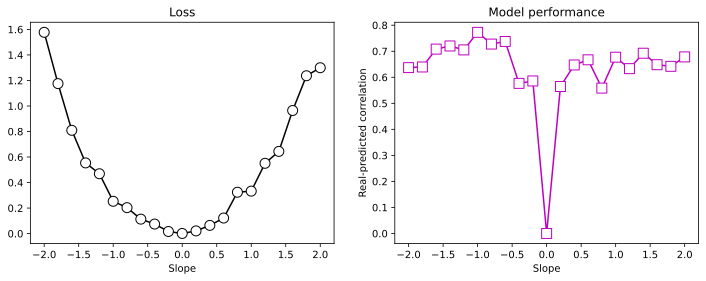

In [111]:
# Step 4. Plotting loss and correlation coeff

fig,ax = plt.subplots(1,2, figsize=(12,4))

# plotting average loss for each run
ax[0].plot(slope,np.mean(results[:,:,0], axis=1), 'ko-',markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

# plotting average correlation coeff for each run
ax[1].plot(slope,np.mean(results[:,:,1],axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()